In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def detectFace(faceCascade, src):
    
    src = src.copy()
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray, 1.1, 3) # 0, overlap (neighbor) 3 is default (filtering false positive)

    for (x, y, w, h) in faces:
        # draw face bbox
        cv2.rectangle(src, (x,y),(x+w, y+h),(255,0,0), 2)
        
    plt.imshow(src[:,:,::-1])
    plt.show()

In [5]:
def detectFaceAndEyes(faceCascade, eyeCascade, src):
    
    src = src.copy()
      
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray, 1.1, 3) # 0 overlap (neighbor) 3 is default (filtering false positive)

    for (x, y, w, h) in faces:
        # draw face bbox
        cv2.rectangle(src, (x,y),(x+w, y+h),(255,0,0), 2)
        
        # only detected face area 
        roi_gray  = gray[y:y+h, x:x+w]
        roi_color = src[y:y+h, x:x+w]
        eyes = eyeCascade.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
    plt.imshow(src[:,:,::-1])
    plt.show()
    

In [8]:
# 1. load trained parameters
faceCascade= cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')


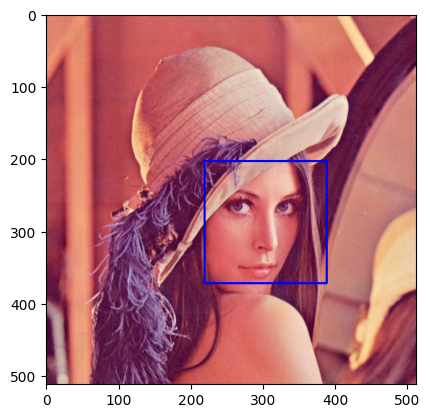

In [6]:
 
# 1. single face
filename = 'lena.jpg' 
src = cv2.imread(filename)
detectFace(faceCascade, src)



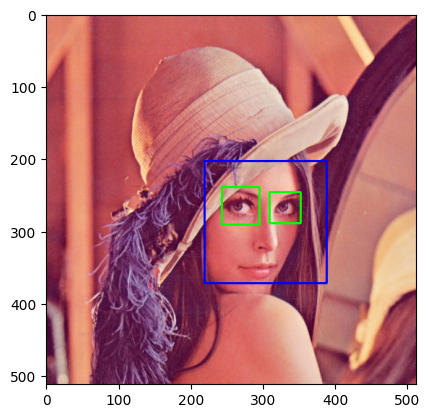

In [9]:
detectFaceAndEyes(faceCascade, eyeCascade, src)

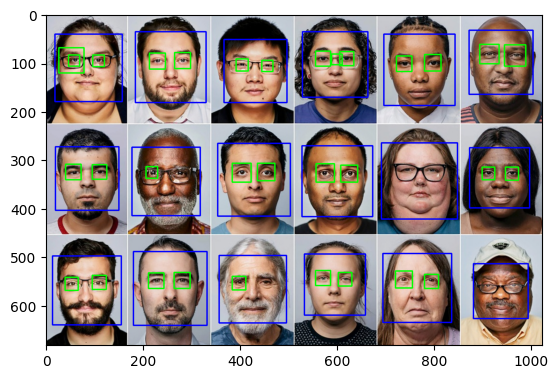

In [10]:

# 2. many faces with scale
filename = 'people.jpg'  
src = cv2.imread(filename)
detectFaceAndEyes(faceCascade, eyeCascade, src)


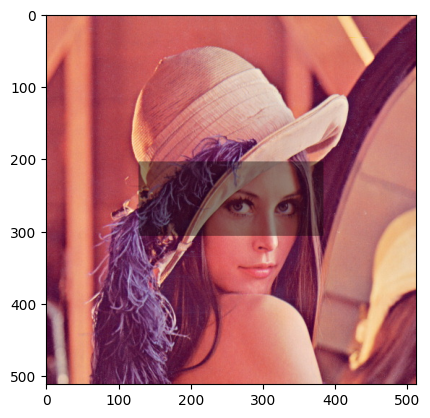

In [11]:
# 3. foolling 1
filename = 'lena.jpg' 
src = cv2.imread(filename)

height, width, _ = src.shape
src = src.astype(np.int32)
src[4*height//10:6*height//10,width//4:-width//4, :]  = src[4*height//10:6*height//10,width//4:-width//4, :]*6/10
src = src.astype(np.uint8)
detectFace(faceCascade, src)


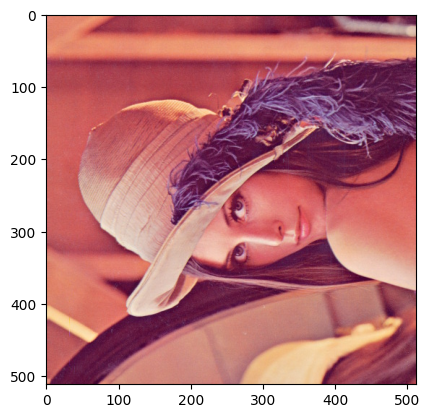

In [12]:
# 3. foolling 2
filename = 'lena.jpg' 
src = cv2.imread(filename)
detectFace(faceCascade, np.swapaxes(src,0,1))